<a href="https://colab.research.google.com/github/sominshim/Predicting_Personality_through_Text/blob/somin/mbti_crawling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Crawling Data 

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
filename = '/content/drive/My Drive/mbti_1.csv'

data = pd.read_csv(filename)
data.head()

type                                              posts
0  INFJ  'http://www.youtube.com/watch?v=qsXHcwe3krw|||...
1  ENTP  'I'm finding the lack of me in these posts ver...
2  INTP  'Good one  _____   https://www.youtube.com/wat...
3  INTJ  'Dear INTP,   I enjoyed our conversation the o...
4  ENTJ  'You're fired.|||That's another silly misconce...

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


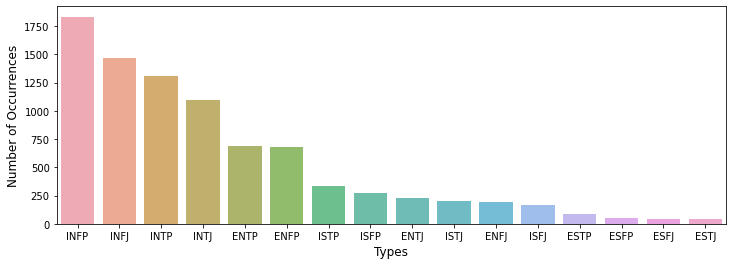

In [4]:
cnt_srs = data['type'].value_counts()

plt.figure(figsize=(12,4))
sns.barplot(cnt_srs.index, cnt_srs.values, alpha=0.8)
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Types', fontsize=12)
plt.show()

In [219]:
need_crawling = 2000 - data['type'].value_counts()
need = DataFrame(data=need_crawling)
need['num'] = need['type']/35 +1

In [238]:
num_df = DataFrame(need['num'].astype('int'))

## crawling

In [5]:
# -*- coding: utf-8 -*-
import requests
from bs4 import BeautifulSoup
import pandas as pd
from datetime import datetime
from pprint import pprint
from tqdm import tqdm_notebook

In [7]:
data['type'].unique()

array(['INFJ', 'ENTP', 'INTP', 'INTJ', 'ENTJ', 'ENFJ', 'INFP', 'ENFP',
       'ISFP', 'ISTP', 'ISFJ', 'ISTJ', 'ESTP', 'ESFP', 'ESTJ', 'ESFJ'],
      dtype=object)

In [10]:
categories = ['ISTJ', 'ISFJ', 'ESTJ', 'ESFJ', 'ISTP', 'ESTP', 'ESFP','ISFP', 
              'INTJ','INTP','ENTJ', 'ENTP', 'INFJ','INFP','ENFJ','ENFP']

In [190]:
def extraction(url):
  # content = []
  breq = requests.get(url, headers={'User-Agent':'Mozilla/5.0'})
  bsoup = BeautifulSoup(breq.content, 'lxml')

  return bsoup.select('.bbWrapper')[0].text

In [254]:
def crawler(mbti, num, mbti_url):
  for i in range(num):
    url = mbti_url + str(i+1)
    req = requests.get(url, headers={'User-Agent':'Mozilla/5.0'})
    bsoup = BeautifulSoup(req.content, 'html.parser')

    title = bsoup.select('.structItem-title') #대괄호는  h3#articleTitle 인 것중 첫번째 그룹만 가져오겠다.

    url_sub = []
    for link in title:
      linkadd = link.find("a", attrs={'class':''})['href']

      url_sub.append("https://www.personalitycafe.com/" + linkadd)

    contents = []
    for j in tqdm_notebook(range(len(url_sub))):
      # print(url_sub[j])
      contents.append(extraction(url_sub[j]))
      add = pd.DataFrame(data = contents, columns=['posts'])
    
    if i==0:
      df = add
    else:
      df = pd.concat([df, add], axis=0)

  df['type'] = str(mbti)

  return df

In [209]:
from pandas import Series, DataFrame
sample = {'type':['initial'],
        'posts':['initial']}
df = DataFrame(sample)
df = df.drop([0])

Empty DataFrame
Columns: [type, posts]
Index: []

In [251]:
 num_df

num
INFP    5
INFJ   16
INTP   20
INTJ   26
ENTP   38
ENFP   38
ISTP   48
ISFP   50
ENTJ   51
ISTJ   52
ENFJ   52
ISFJ   53
ESTP   55
ESFP   56
ESFJ   56
ESTJ   57

In [252]:
for mbti_type in categories:
  print(mbti_type)
  num_df.loc[mbti_type]['num']

52

In [255]:
for mbti_type in categories:
  print(mbti_type)
  n = num_df.loc[mbti_type]['num']  
  url = "https://www.personalitycafe.com/forums/" + str(mbti_type) + "-articles.82/page-"
  df = pd.concat([df, crawler(mbti_type, n, url)], axis=0)

ISTJ


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`



ISFJ



ESTJ



ESFJ



ISTP



ESTP



ESFP



ISFP



INTJ



INTP



ENTJ



ENTP



INFJ



INFP



ENFJ



ENFP


In [256]:
df

type                                              posts
0   initial                                            initial
0      ISTJ  First time posting in a forum since about 15 y...
1      ISTJ  Hello INFJs! In this interview, I got a chance...
2      ISTJ  These articles are written by by Darbright (IN...
3      ISTJ  I am sure that I am not the first person to po...
..      ...                                                ...
9      ENFP  I found this on discoveryourpersonality.com.\n...
10     ENFP  INFJ Workplace Strengths\n• are someone who re...
11     ENFP  INFJ personality is idealistic, imaginative, v...
12     ENFP  You're future-oriented, and direct your insigh...
13     ENFP  The Protector​ \n\nAs an INFJ, your primary mo...

[10255 rows x 2 columns]

In [258]:
df = df.reset_index().drop([0]).reset_index().drop(['level_0', 'index'], axis=1)

In [259]:
df.to_csv('/content/drive/My Drive/mbti_crawling.csv')